# Chirped Z-transform

In [66]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 250


## X Scheme

In [68]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z

from diffractio.utils_math import nextpow2
from numpy.fft import fft, ifft


In [69]:
radius = 250*um
xin = np.linspace(-radius, radius, 4096)
wavelength = 550 * nm
z = 2*mm


In [70]:

t0 = Scalar_mask_X(xin, wavelength)
t0.slit(x0=0, size=radius/2)
u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0*u0


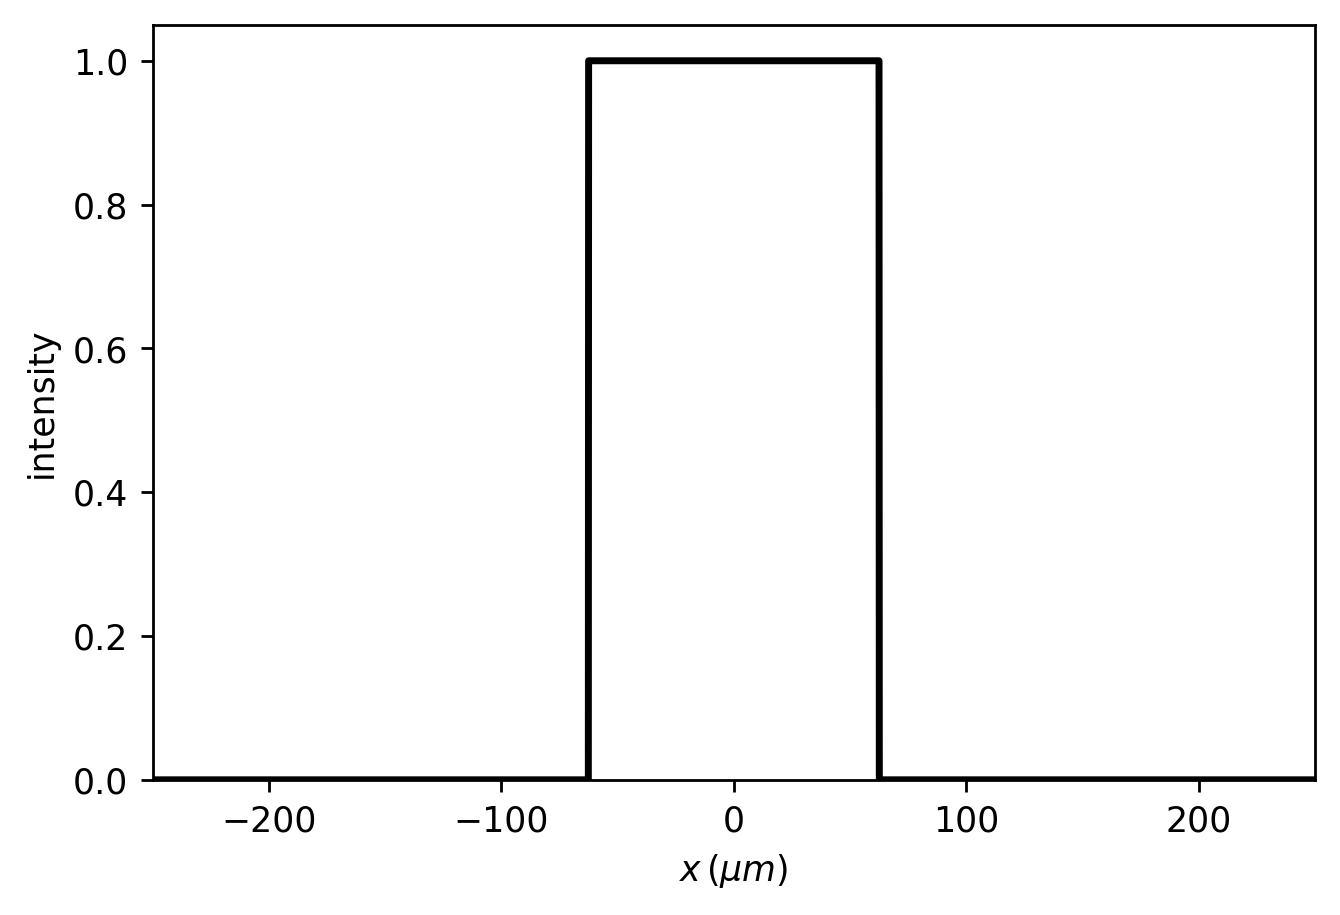

In [71]:
u1.draw()


### to just one data

In [72]:
xout = 0.
z = 2*mm


In [73]:
%%time
u2 = u1.CZT(z, xout)
print(u2)


[0.04131865-0.87270006j]
CPU times: user 2.19 ms, sys: 0 ns, total: 2.19 ms
Wall time: 1.9 ms


### to field_z

In [74]:
xout = 0
z = np.linspace(.5*mm, 10*mm, 1024)


In [75]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 887 ms, sys: 3.79 ms, total: 890 ms
Wall time: 890 ms


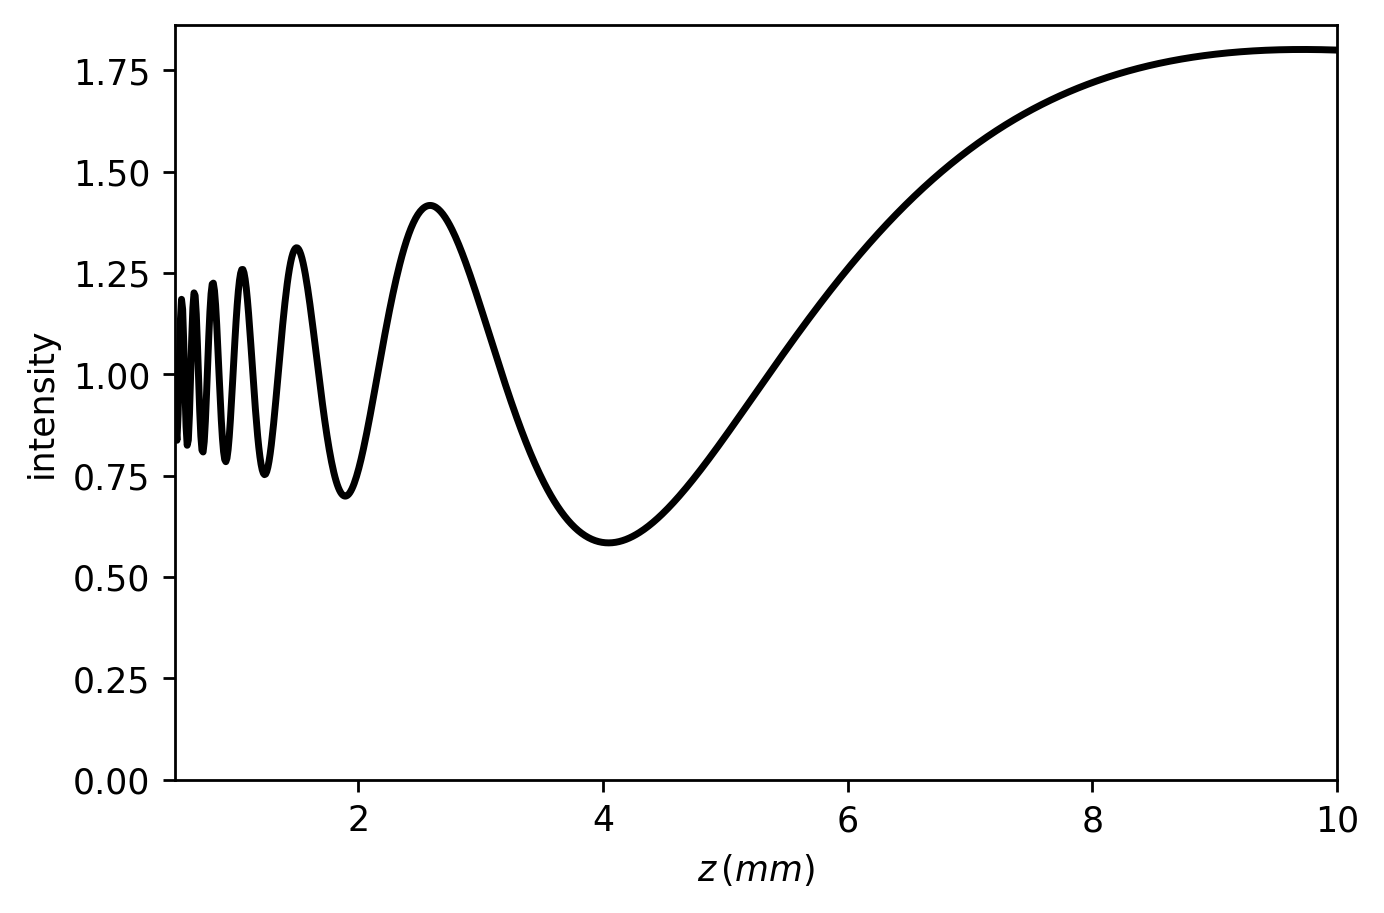

In [76]:
u2.draw(z_scale='mm')


### to field_X

In [77]:
xout = np.linspace(-radius, radius, 256)
z = 2 * mm


In [78]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 5.72 ms, sys: 321 µs, total: 6.04 ms
Wall time: 5.68 ms


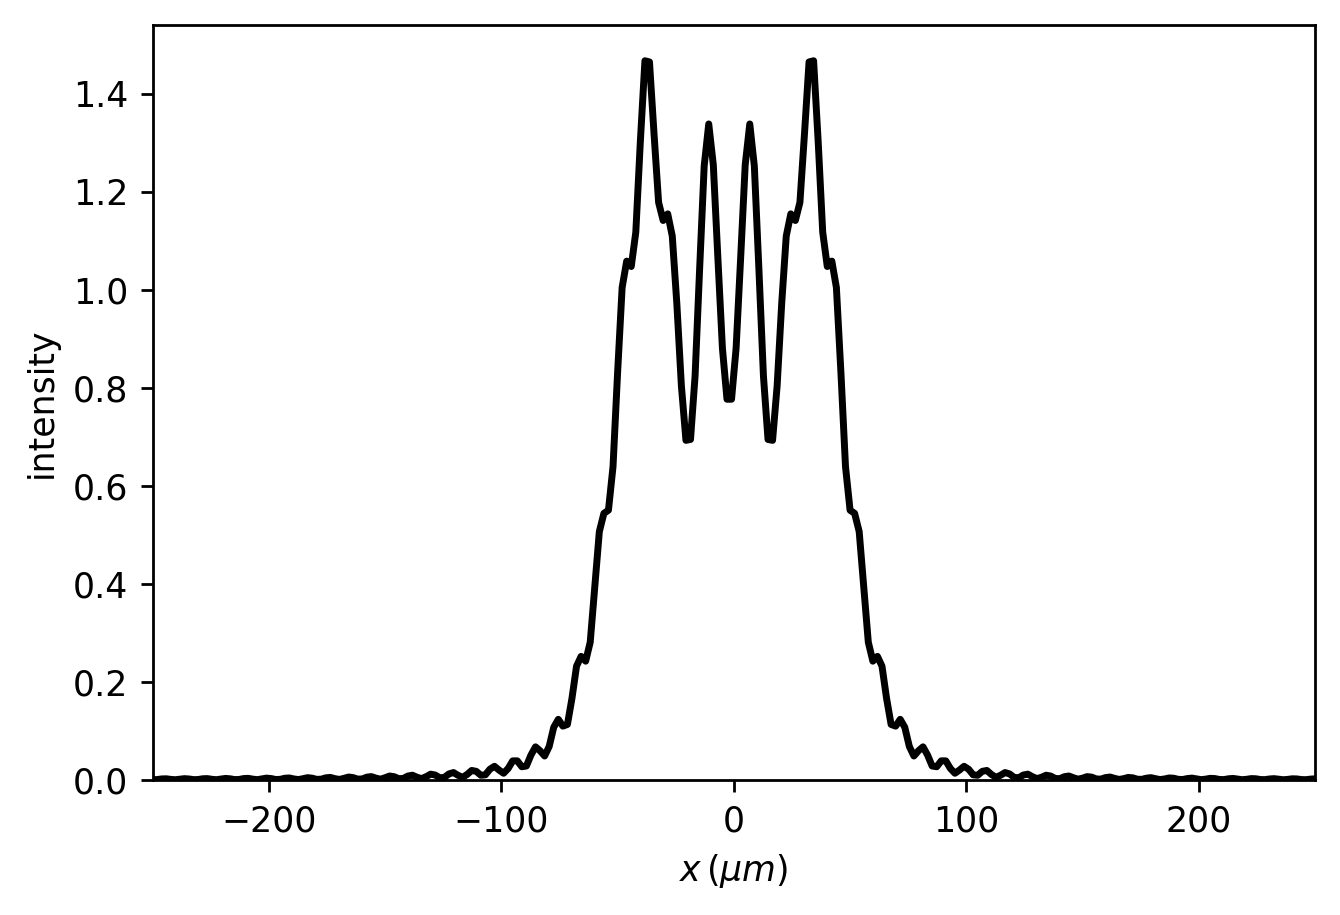

In [79]:
u2.draw()


### to field_XZ

In [80]:
xout = np.linspace(-radius/2, radius/2, 256)
z = np.linspace(1 * mm, 15 * mm, 128)


In [81]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 465 ms, sys: 0 ns, total: 465 ms
Wall time: 465 ms


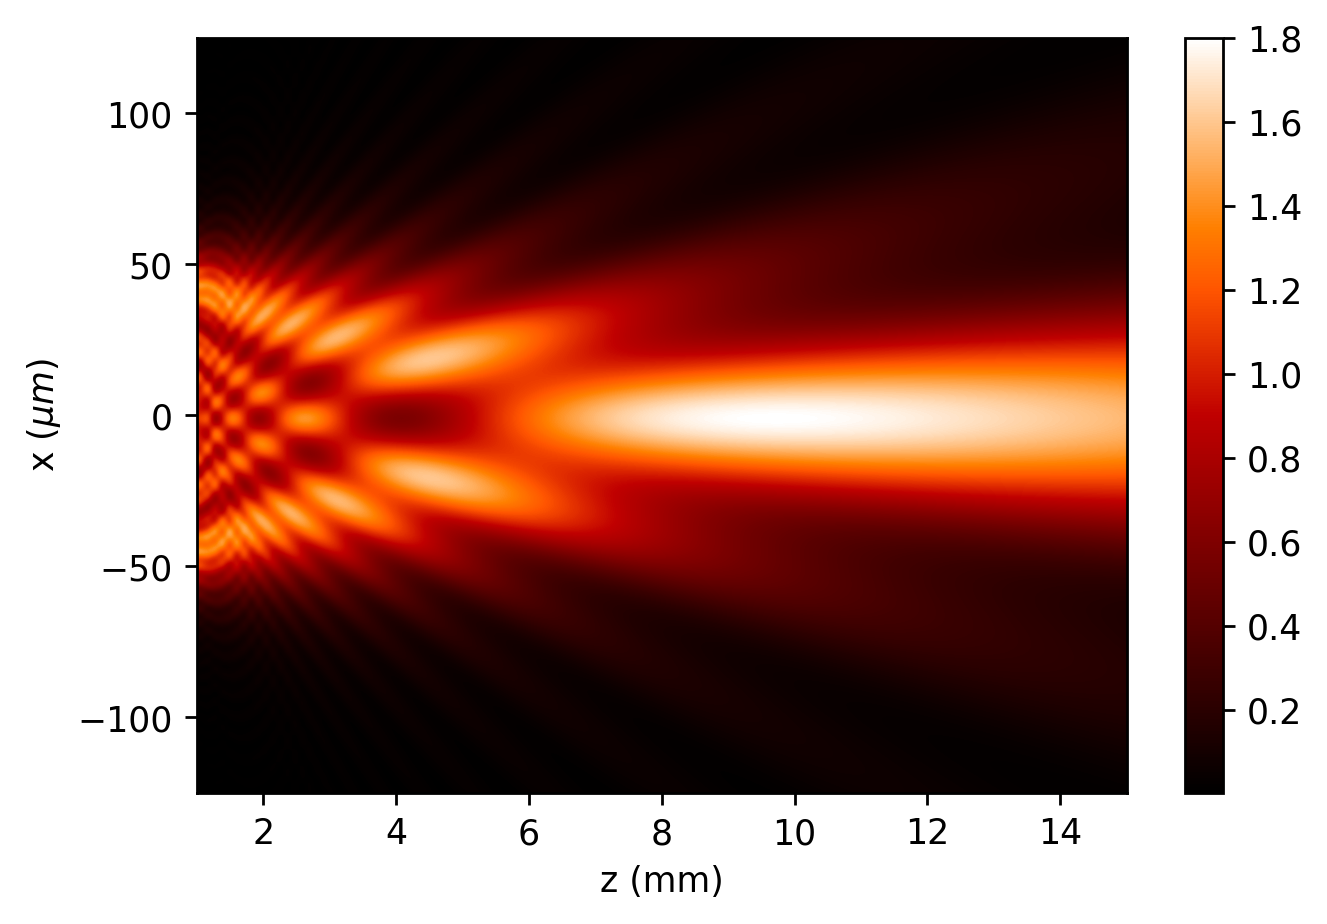

In [82]:
u2.draw(logarithm=0, z_scale='mm')
plt.colorbar()


## XY Scheme

In [83]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z
from diffractio.scalar_fields_X import Scalar_field_X

from diffractio.utils_math import nextpow2
from numpy.fft import fft, ifft


In [84]:
radius = 75
xin = np.linspace(-radius, radius, 256)
yin = np.linspace(-radius, radius, 256)
wavelength = 550 * nm


In [85]:
xout = np.linspace(-radius, radius, 256)
yout = np.linspace(-radius, radius, 256)
z = 1 * mm


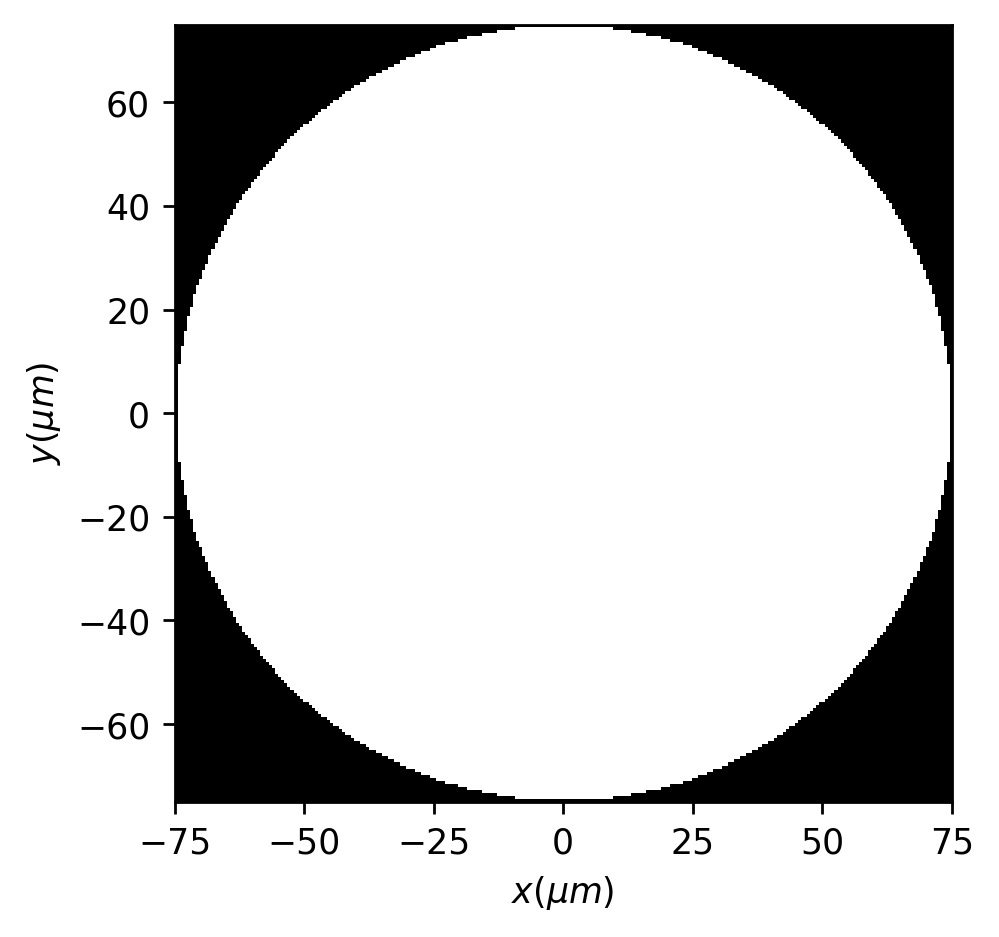

In [86]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.circle(r0=(0, 0), radius=radius)

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw()


### to data

In [87]:
xout = 0
yout = 0.
z = .5*mm


In [88]:
%%time
u2 = u1.CZT(z, xout, yout)
print("{}".format(np.abs(u2)**2))


0.9611722556166583
CPU times: user 13.4 ms, sys: 275 µs, total: 13.7 ms
Wall time: 12.9 ms


### to field_X

In [89]:
xout = np.linspace(-radius, radius, 512)
yout = 0.
z = .5 * mm


CPU times: user 52.8 ms, sys: 4.15 ms, total: 56.9 ms
Wall time: 56.1 ms


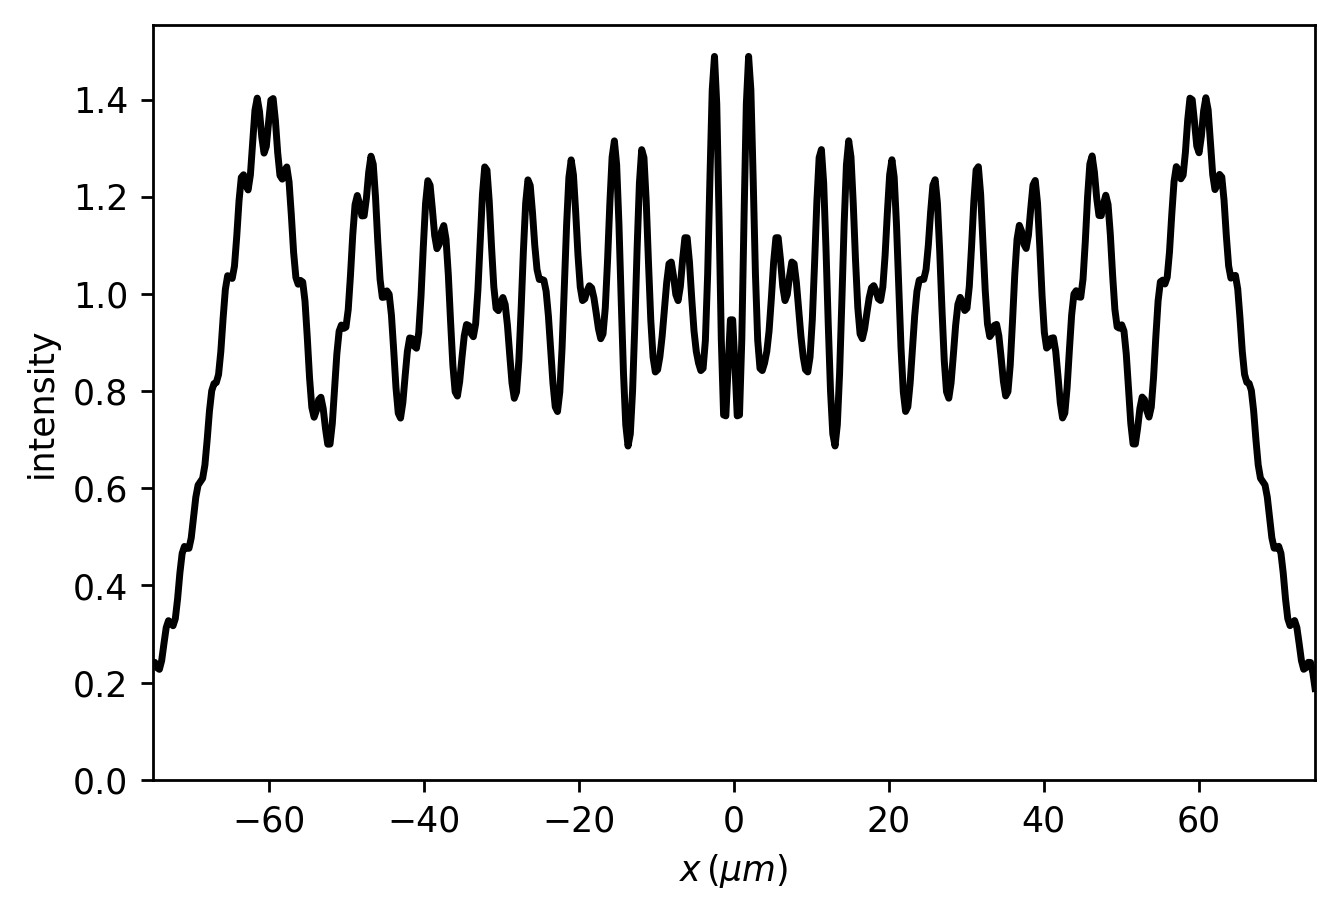

In [90]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_XY


In [91]:
xout = np.linspace(-radius, radius, 256)
yout = np.linspace(-radius, radius, 256)
z = .25 * mm


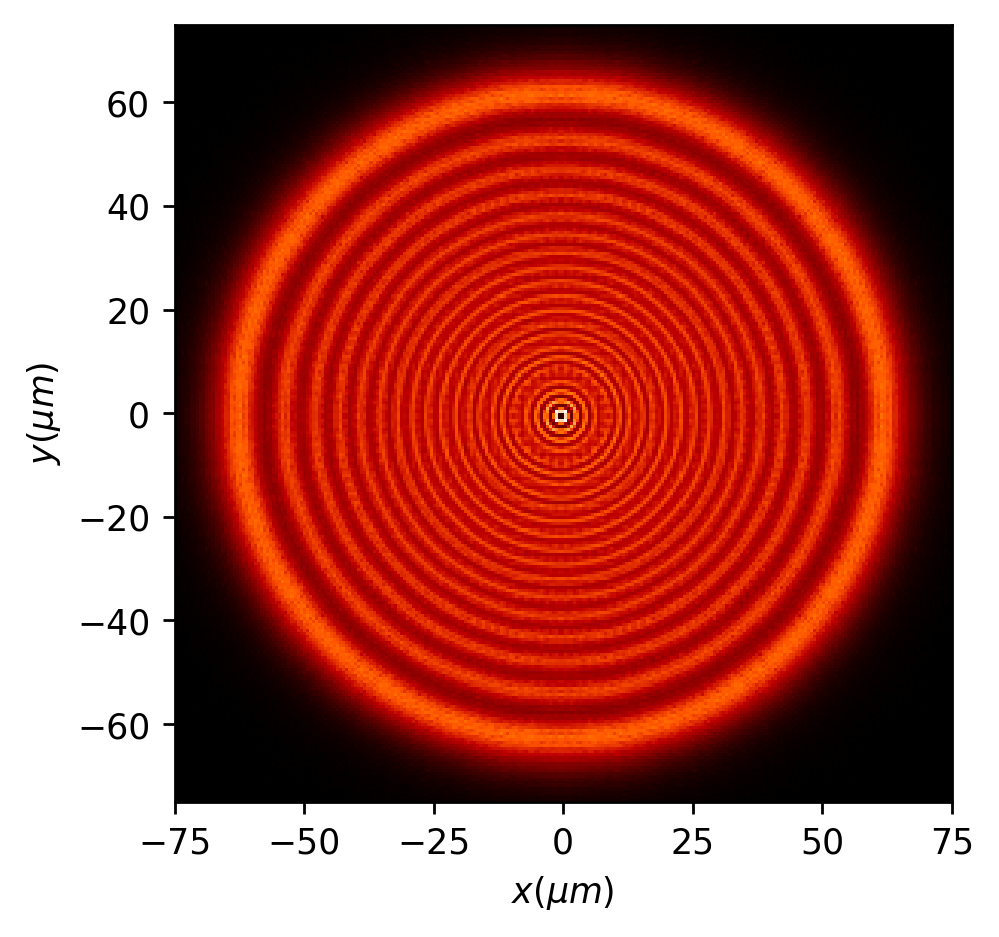

In [92]:
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_Z

In [93]:
xout = -1.
yout = 0.
z = np.linspace(0.25*mm, 1*mm, 256)


CPU times: user 2.23 s, sys: 4.07 ms, total: 2.23 s
Wall time: 2.23 s


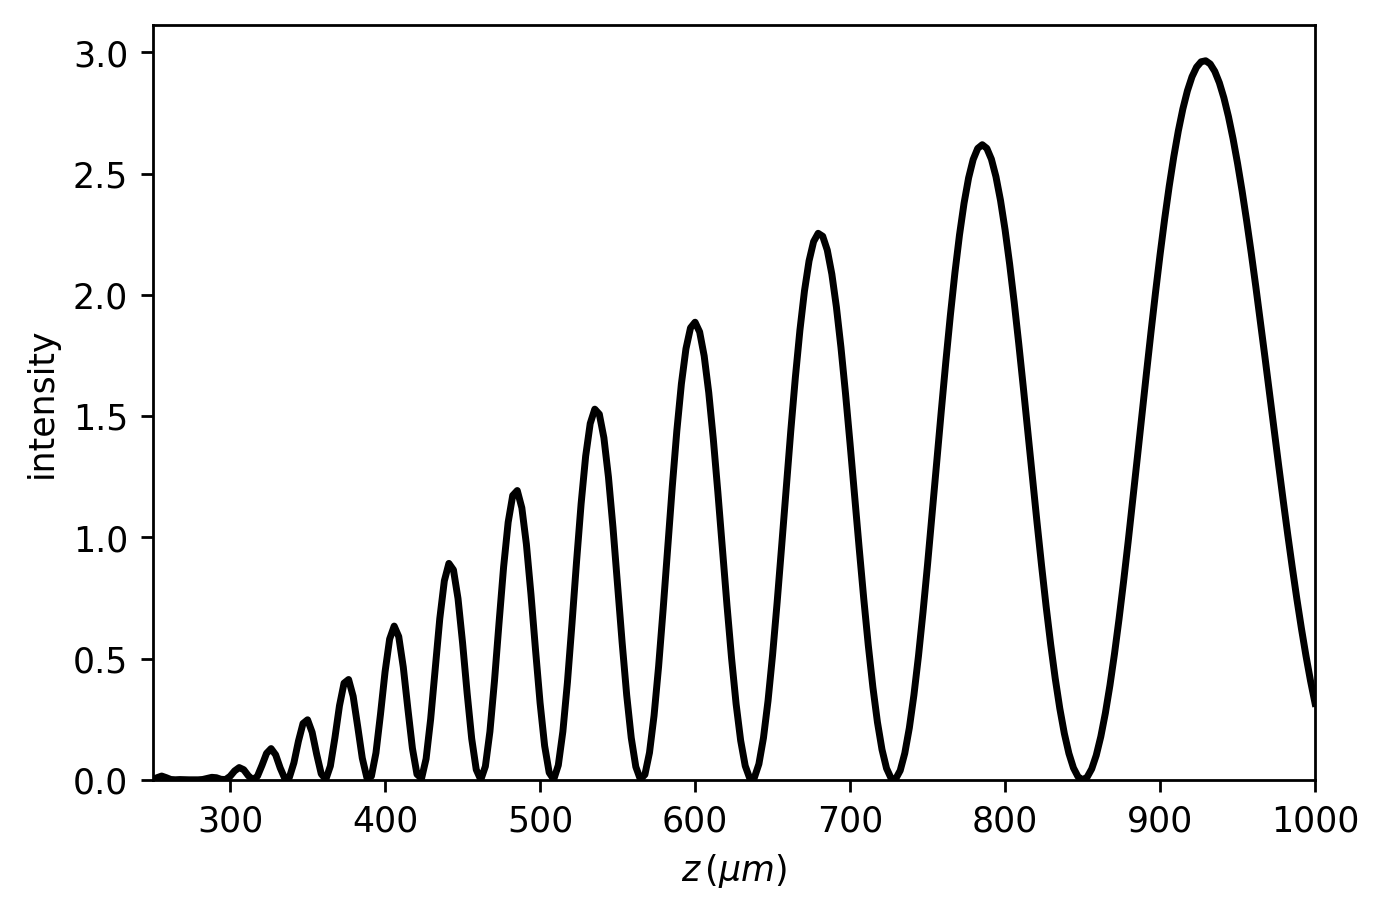

In [94]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_XZ

In [95]:
xout = np.linspace(-radius, radius, 256)
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 128)


CPU times: user 1.74 s, sys: 112 µs, total: 1.74 s
Wall time: 1.74 s


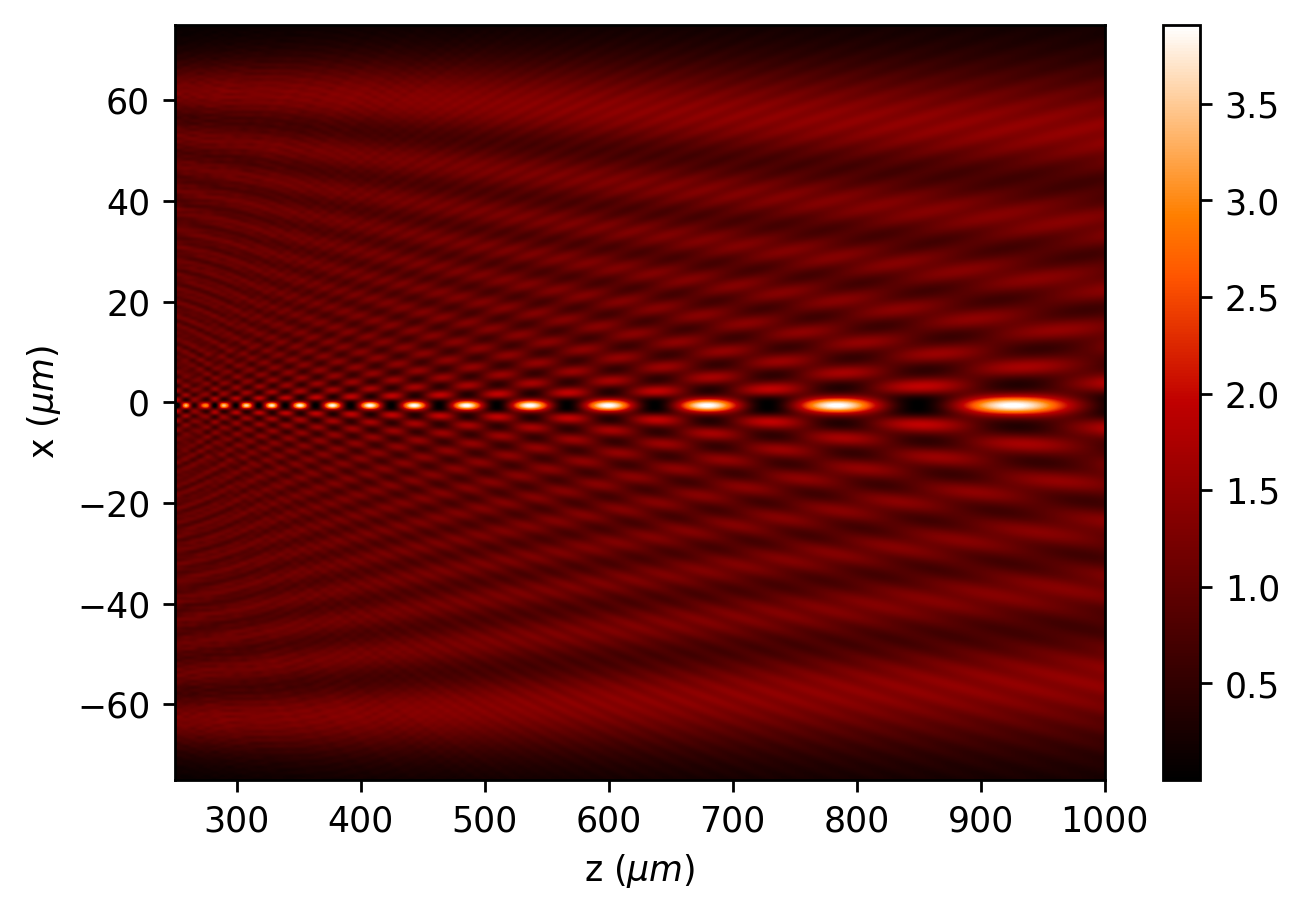

In [96]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()
plt.colorbar()


### to field_XYZ

In [97]:
xout = np.linspace(-radius, radius, 128)
yout = np.linspace(-radius, radius, 128)
z = np.linspace(0.25 * mm, 3 * mm, 256)


In [98]:
%%time
u2 = u1.CZT(z, xout, yout)


CPU times: user 3.74 s, sys: 151 ms, total: 3.89 s
Wall time: 3.9 s


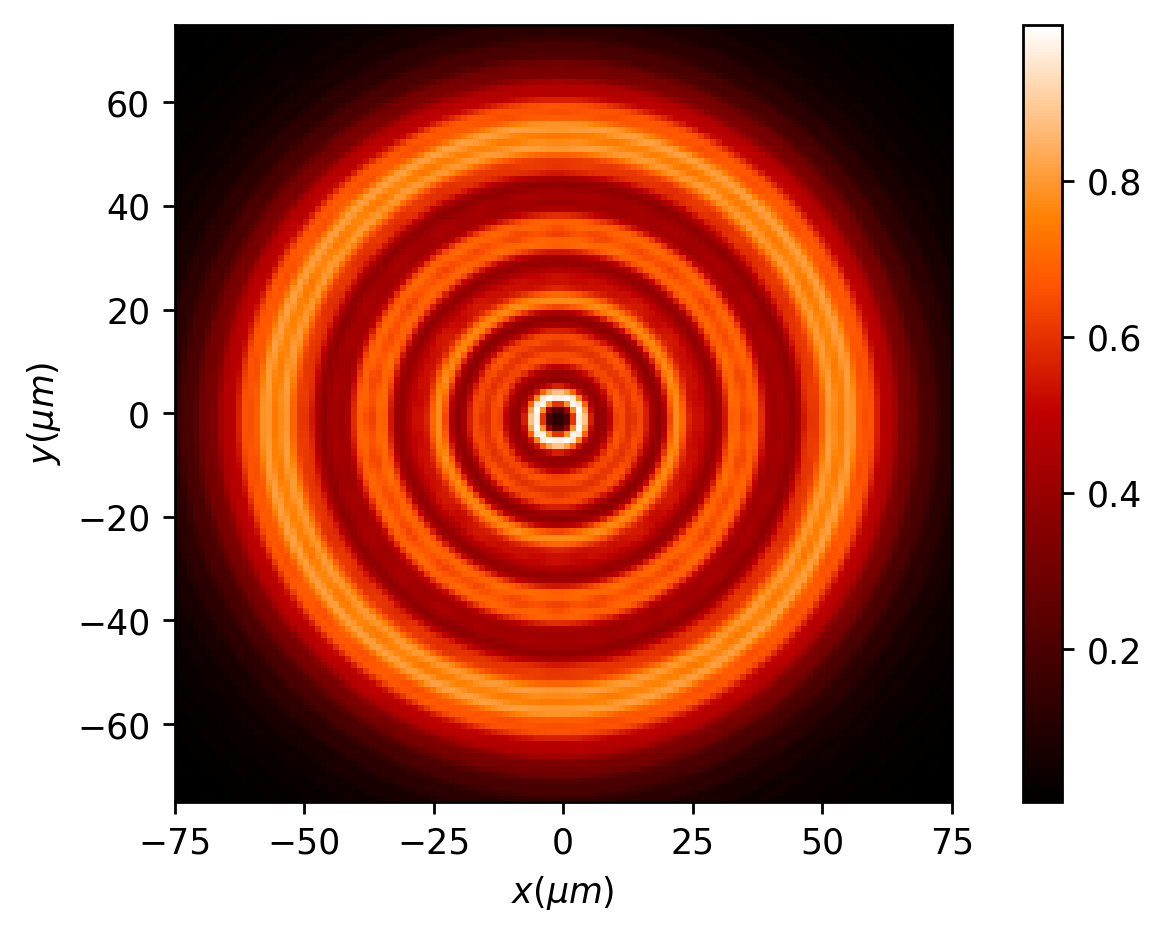

In [99]:
u2.draw_XY(z0=1*mm)
plt.colorbar()


<Figure size 1500x1000 with 0 Axes>

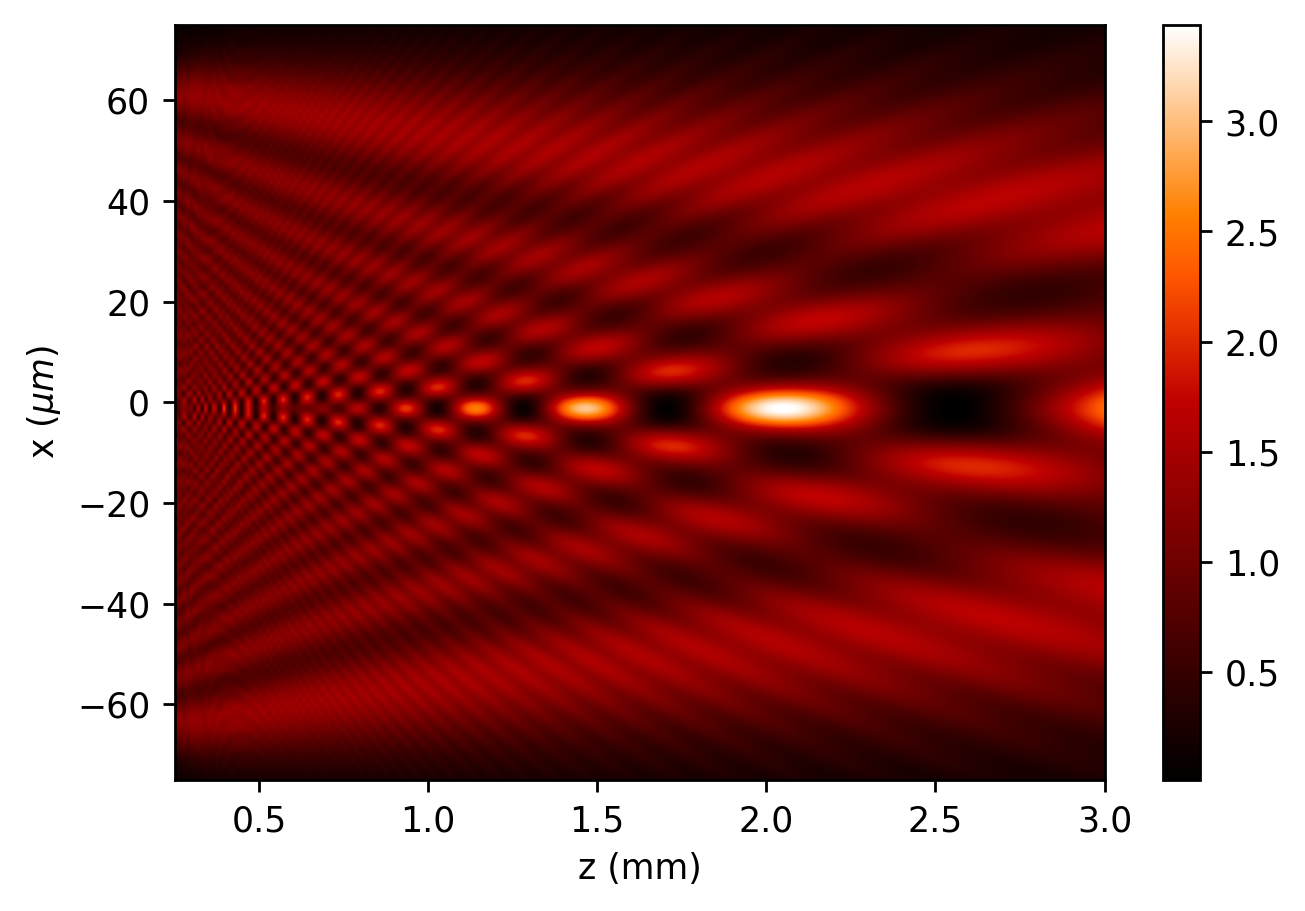

In [100]:
u2.draw_XZ(y0=0, logarithm=0, z_scale='mm')
plt.colorbar()


## CZT for reducing the output size

Chirped z-Transform algorithm is specially indicated for cases where the output field is much smaller than the input field, as you can choose the position and sampling of the field. An important example for this is the focusing of a lens.

### X scheme

In [101]:
radius = 3*mm
xin = np.linspace(-radius, radius, 4096)
wavelength = 550 * nm
focal = 250 * mm


In [102]:

t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal, radius=radius)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0*u0


In [103]:
xout = 0.
z = np.linspace(focal-30*mm, focal+30*mm, 128)


CPU times: user 309 ms, sys: 11.5 ms, total: 321 ms
Wall time: 320 ms


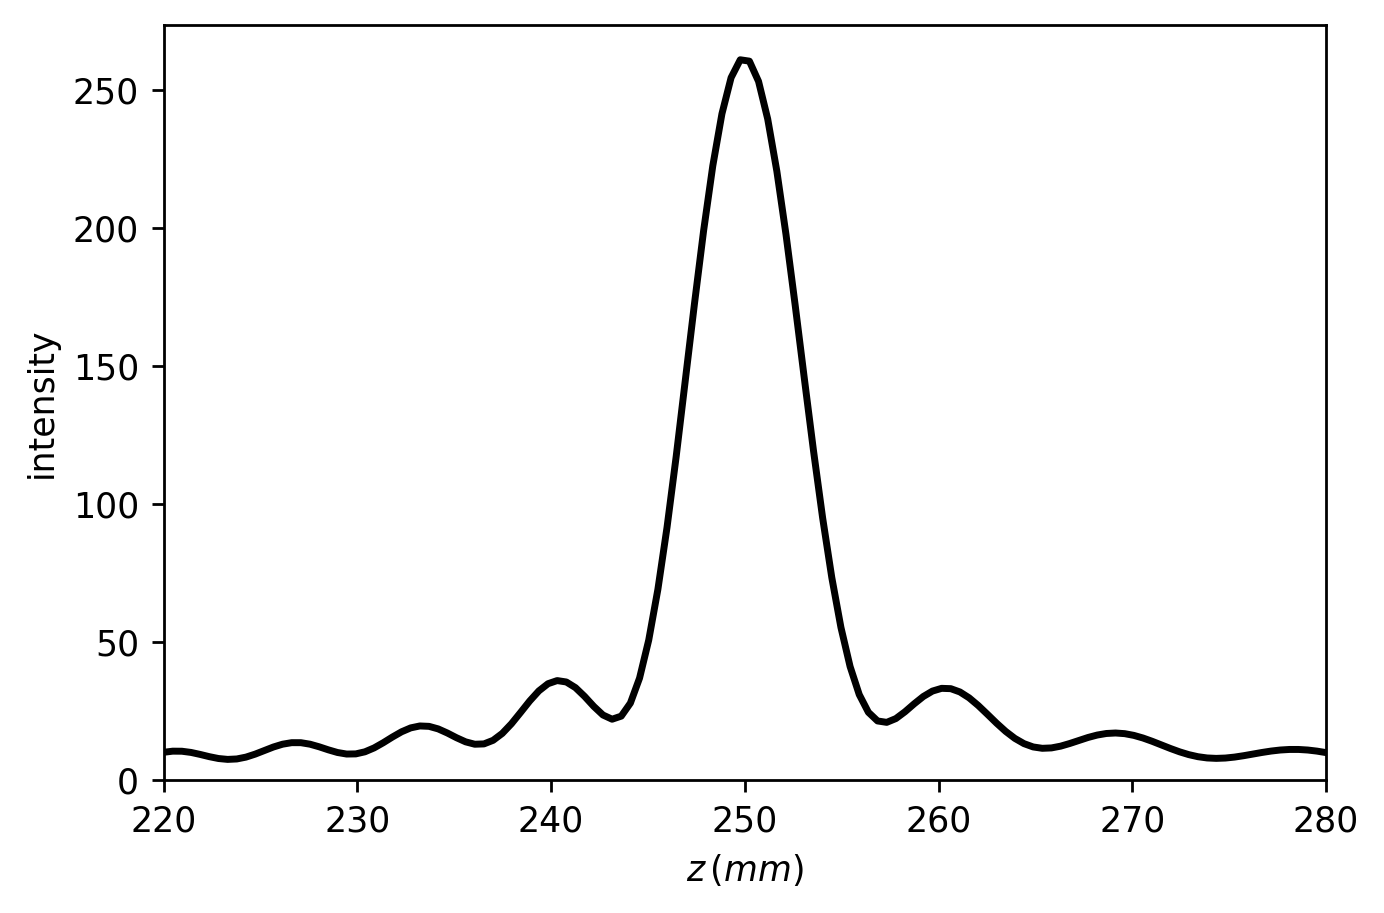

In [104]:
%%time
u2 = u1.CZT(z, xout)
u2.draw(z_scale='mm')


In [105]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = focal


CPU times: user 23.1 ms, sys: 529 µs, total: 23.6 ms
Wall time: 23 ms


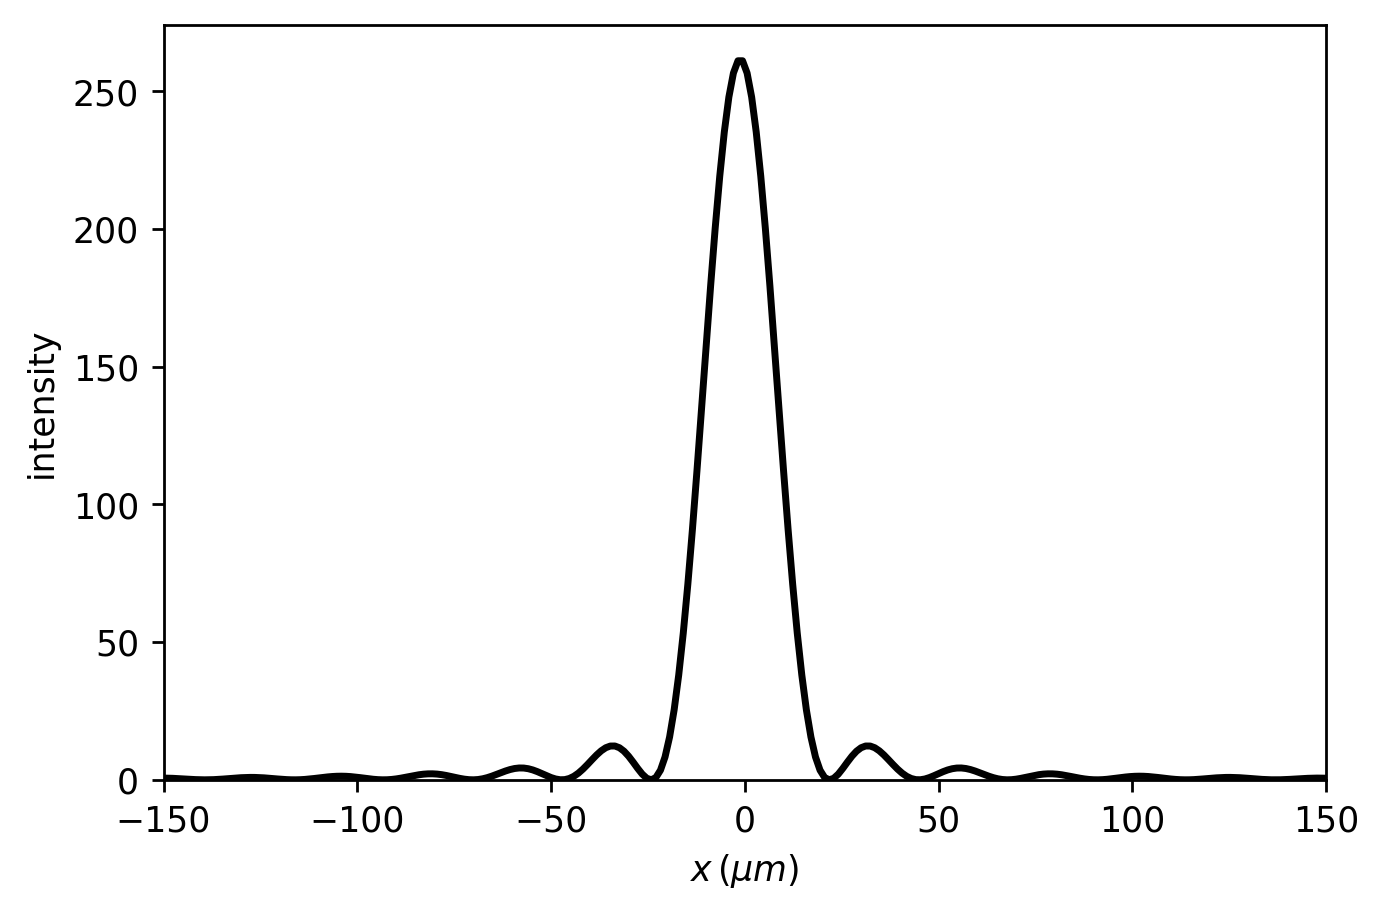

In [106]:
%%time
u2 = u1.CZT(focal, xout)
u2.draw()


In [107]:
xout = np.linspace(-150 * um, 150 * um, 128)
z = np.linspace(focal-20*mm, focal+20*mm, 128)


CPU times: user 670 ms, sys: 0 ns, total: 670 ms
Wall time: 669 ms


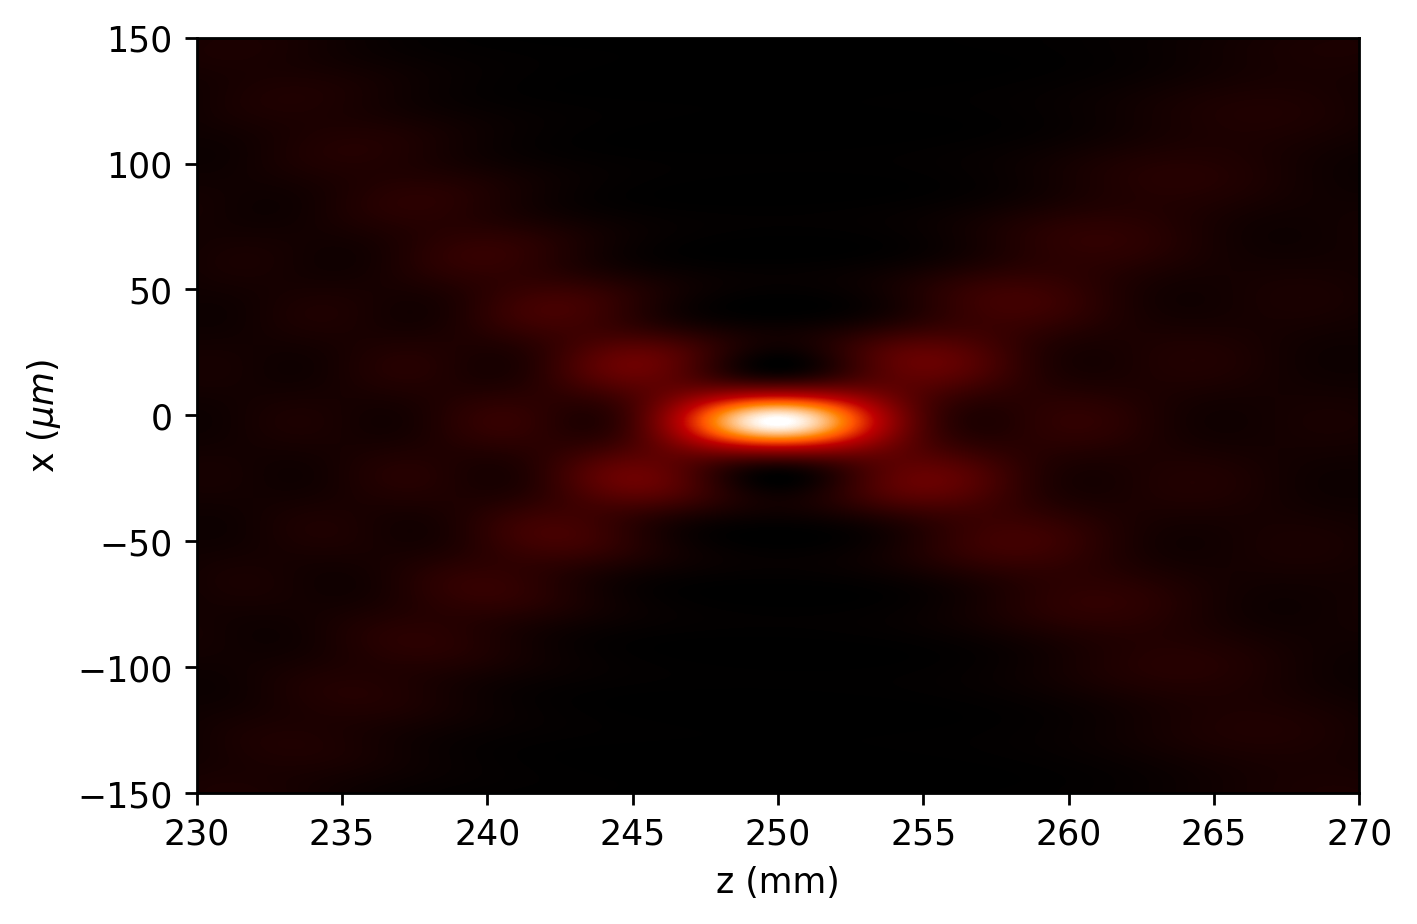

In [108]:
%%time
u2 = u1.CZT(z, xout)
u2.draw(logarithm=0, z_scale='mm')


### XY scheme

In [109]:
radius = 2 * mm
xin = np.linspace(-radius, radius, 512)
yin = np.linspace(-radius, radius, 512)
wavelength = 550 * nm
focal = 500 * mm


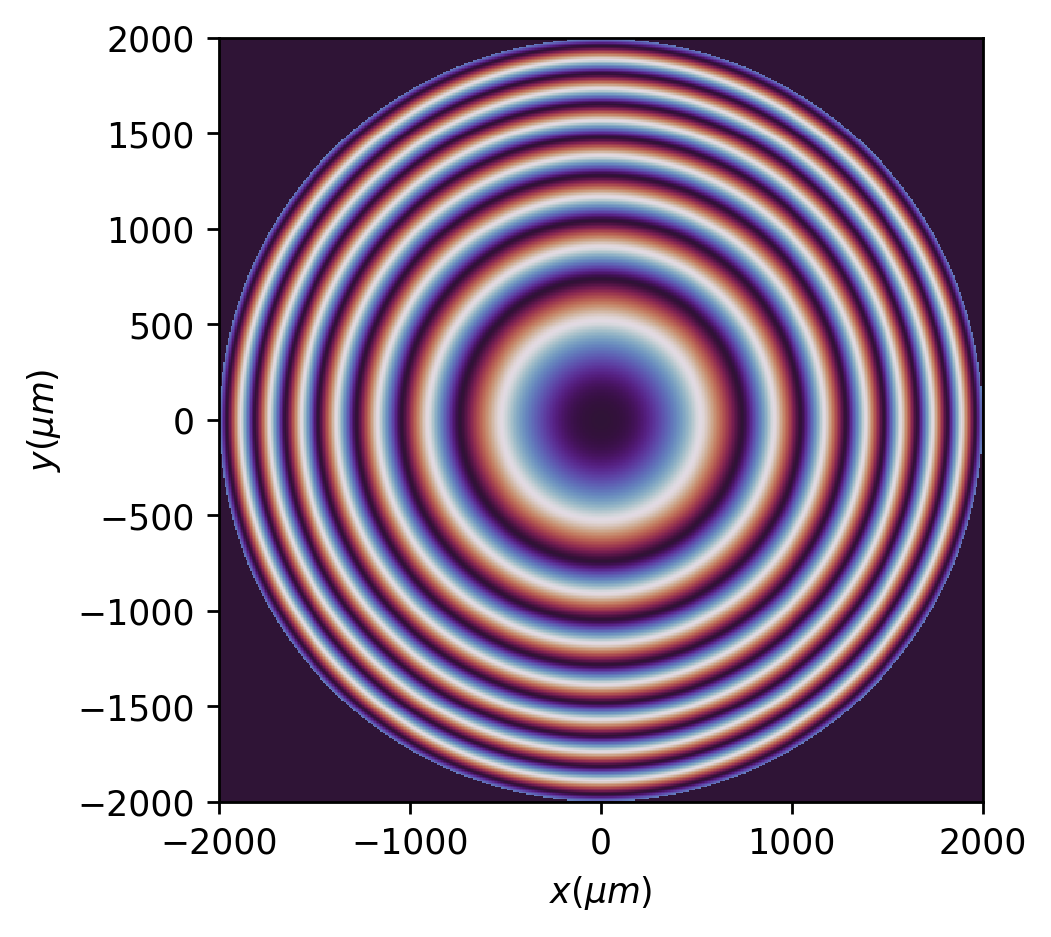

In [110]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.lens(r0=(0, 0), focal=focal, radius=radius)

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw('phase')


In [111]:
xout = np.linspace(-150 * um, 150 * um, 128)
yout = np.linspace(-150 * um, 150 * um, 128)
z = focal


CPU times: user 167 ms, sys: 40.6 ms, total: 208 ms
Wall time: 126 ms


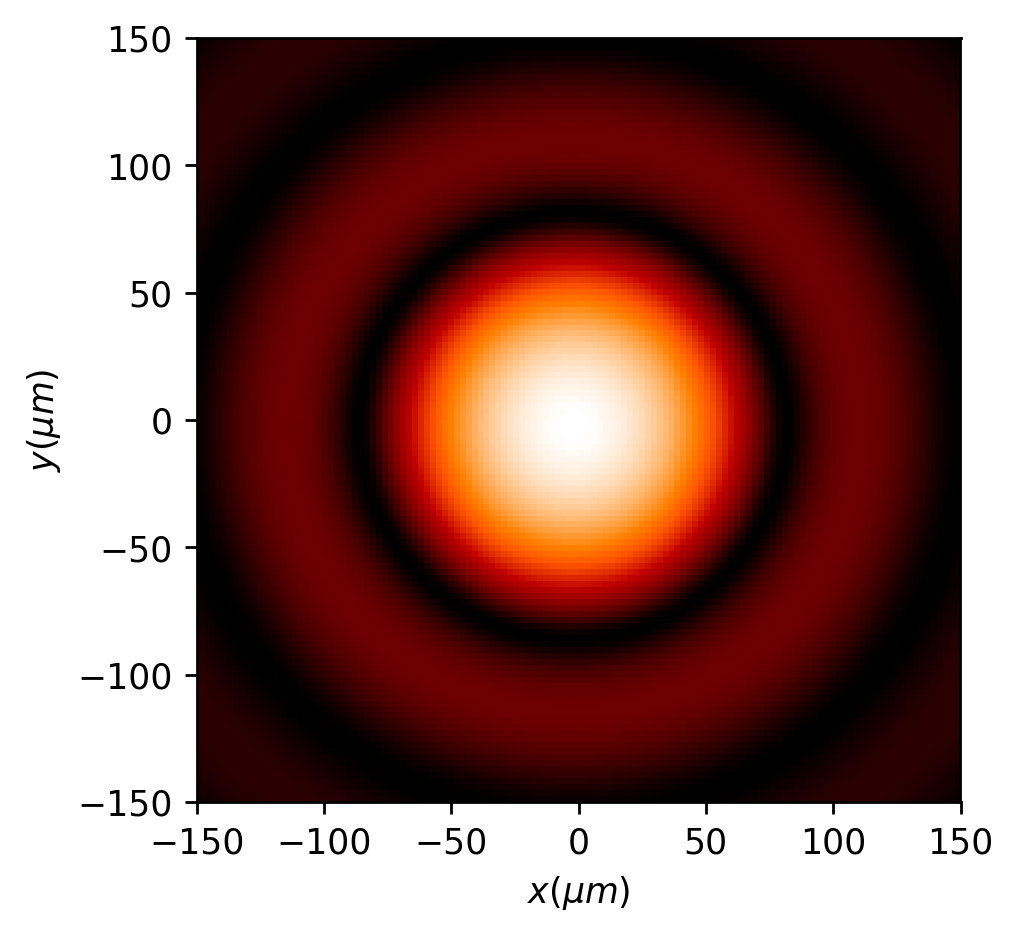

In [112]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw(logarithm=1e-1)
